# Logistc Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets

## Dataset

In [2]:
dataset = datasets.fetch_kddcup99(subset='SA', as_frame=True)
print(dataset['DESCR'])

.. _kddcup99_dataset:

Kddcup 99 dataset
-----------------

The KDD Cup '99 dataset was created by processing the tcpdump portions
of the 1998 DARPA Intrusion Detection System (IDS) Evaluation dataset,
created by MIT Lincoln Lab [2]_. The artificial data (described on the `dataset's
homepage <https://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html>`_) was
generated using a closed network and hand-injected attacks to produce a
large number of different types of attack with normal activity in the
background. As the initial goal was to produce a large training set for
supervised learning algorithms, there is a large proportion (80.1%) of
abnormal data which is unrealistic in real world, and inappropriate for
unsupervised anomaly detection which aims at detecting 'abnormal' data, i.e.:

* qualitatively different from normal data
* in large minority among the observations.

We thus transform the KDD Data set into two different data sets: SA and SF.

* SA is obtained by simply selecting all

In [3]:
dataset['target'].value_counts()

labels
b'normal.'         97278
b'smurf.'           2373
b'neptune.'          927
b'warezclient.'       16
b'back.'              16
b'ipsweep.'           13
b'satan.'             13
b'teardrop.'          10
b'portsweep.'          7
b'nmap.'               1
b'pod.'                1
Name: count, dtype: int64

In [4]:
df = dataset['frame']
df.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
count,100655,100655,100655,100655,100655,100655,100655,100655,100655,100655,...,100655,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655.0,100655
unique,2357,3,50,9,3249,10688,2,3,2,20,...,256,101.0,99.0,101.0,57.0,92.0,55.0,101.0,101.0,11
top,0,b'tcp',b'http',b'SF',105,0,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
freq,88959,77792,61905,94140,7370,17551,100654,100644,100654,100094,...,57501,65229.0,64432.0,33765.0,50661.0,95003.0,94463.0,91160.0,91247.0,97278


In [5]:
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100650,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
100651,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
100652,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'
100653,0,b'icmp',b'ecr_i',b'SF',1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,b'smurf.'


In [6]:
df.dtypes

duration                       object
protocol_type                  object
service                        object
flag                           object
src_bytes                      object
dst_bytes                      object
land                           object
wrong_fragment                 object
urgent                         object
hot                            object
num_failed_logins              object
logged_in                      object
num_compromised                object
root_shell                     object
su_attempted                   object
num_root                       object
num_file_creations             object
num_shells                     object
num_access_files               object
num_outbound_cmds              object
is_host_login                  object
is_guest_login                 object
count                          object
srv_count                      object
serror_rate                    object
srv_serror_rate                object
rerror_rate 

https://www.geeksforgeeks.org/eafp-principle-in-python/

In [7]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except ValueError:
        pass  # Leave as object (likely categorical)

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,100655.000000,1.006550e+05,1.006550e+05,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,...,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000,100655.000000
mean,209.947206,1.149205e+03,3.272502e+03,0.000010,0.000308,0.000030,0.044210,0.000179,0.695157,0.027728,...,151.999742,201.463593,0.841072,0.055406,0.153366,0.023419,0.009666,0.008635,0.057591,0.055750
std,1339.647965,3.365403e+04,3.694749e+04,0.003152,0.030066,0.009456,0.858205,0.020426,0.460343,3.978385,...,103.452080,87.863613,0.310952,0.177663,0.306437,0.049508,0.091337,0.088124,0.224951,0.219087
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.460000e+02,1.050000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,40.000000,169.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.320000e+02,3.910000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,174.000000,255.000000,1.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.170000e+02,2.013000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,0.090000,0.030000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,3.000000,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.decode('utf-8').astype('category')

In [10]:
df.describe(include=['category'])

,protocol_type,service,flag,labels
count,100655,100655,100655,100655
unique,3,50,9,11
top,tcp,http,SF,normal.
freq,77792,61905,94140,97278


## EDA 
(only for the categorical variables)

In [11]:
for col in df.select_dtypes('category').columns:
    print(df[[col]].value_counts(), end='\n\n')

protocol_type
tcp              77792
udp              19188
icmp              3675
Name: count, dtype: int64

service    
http           61905
smtp            9601
private         8260
domain_u        5862
other           5644
ftp_data        3811
ecr_i           2719
urp_i            537
finger           469
eco_i            402
ntp_u            380
ftp              377
telnet           220
auth             220
pop_3             81
time              53
IRC               42
urh_i             14
X11                9
ssh                4
supdup             3
shell              3
rje                3
domain             3
remote_job         2
tim_i              2
sunrpc             2
link               2
courier            2
uucp_path          2
discard            2
tftp_u             1
sql_net            1
netbios_dgm        1
red_i              1
nnsp               1
netstat            1
netbios_ns         1
name               1
ldap               1
kshell             1
klogin           

## Feature Engineering

### OneHot Encoding

In [12]:
import sklearn.preprocessing as skp
import sklearn.model_selection as sms

Before we do any fit on the data, we do a train/test split:

In [13]:
train_df, test_df = sms.train_test_split(df, random_state=23)

#### OneHotEncoder

In [14]:
ohot = skp.OneHotEncoder(
    sparse_output=False,
    #drop = 'first', # default: None
    handle_unknown =  'infrequent_if_exist', #'infrequent_if_exist', # default: 'error', other option: 'ignore'
    min_frequency = 10 # default: None 
)

#### OneHotEncoding of protocol

In [15]:
oh_protocol = ohot.fit_transform(train_df[['protocol_type']])
oh_protocol

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

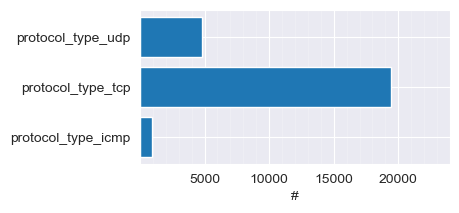

In [16]:
oh_protocol = ohot.transform(test_df[['protocol_type']])

features = ohot.get_feature_names_out()

fig, ax = plt.subplots(1,1, figsize=(4,2))
ax.barh(
    y = range(len(features)),
    width = oh_protocol.sum(axis=0)
)
_ = ax.set_yticks(range(len(features)), features)
_ = ax.set_xticks([5_000, 10_000, 15_000, 20_000])
_ = ax.set_xticks(range(0, 25_000, 1_000), minor=True)
_ = ax.set_xlabel('#')
_ = ax.grid(True)
_ = ax.grid(True, which='minor', alpha=0.2)

#### OneHotEncoding of Service

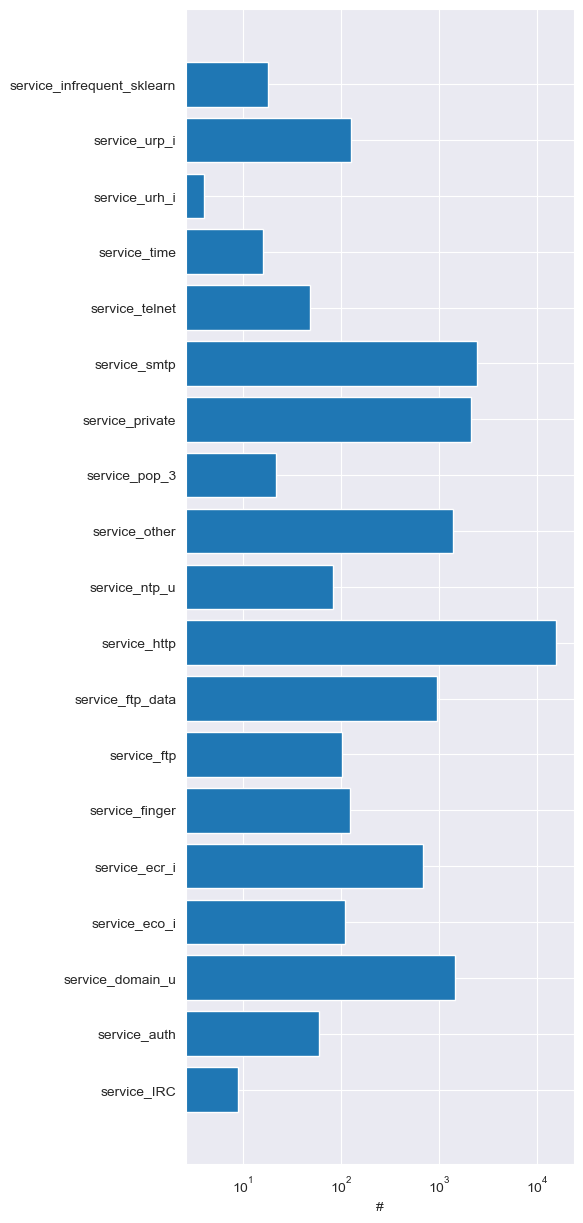

In [17]:
plt.figure(figsize=(5,15))

ohot.fit(train_df[['service']])
oh_service = ohot.transform(test_df[['service']])

features = ohot.get_feature_names_out()

plt.barh(
    y = range(len(features)),
    width = oh_service.sum(axis=0)
)
plt.xscale('log')
_ = plt.yticks(range(len(features)), features)
_ = plt.xlabel('#')

### Pipelining Feature Processing

In [18]:
import sklearn.compose
import sklearn.pipeline as sk_pipe

categorical_cols = df.select_dtypes(include=['category']).columns.tolist()
categorical_cols.remove('labels') # remove the target column
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

ohot = skp.OneHotEncoder(
    sparse_output=False,
    #drop = 'first', # default: None
    handle_unknown = 'infrequent_if_exist', # default: 'error', other option: 'ignore'
    min_frequency = 10 # default: None 
)

preprocessor = sklearn.compose.ColumnTransformer(
    transformers=[
        #('numerical', "passthrough", numerical_cols),
        ('numerical', skp.StandardScaler(), numerical_cols),
        ('onehot', ohot, categorical_cols)
    ]
)
preprocessor

ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                 ['duration', 'src_bytes', 'dst_bytes', 'land',
                                  'wrong_fragment', 'urgent', 'hot',
                                  'num_failed_logins', 'logged_in',
                                  'num_compromised', 'root_shell',
                                  'su_attempted', 'num_root',
                                  'num_file_creations', 'num_shells',
                                  'num_access_files', 'num_outbound_cmds',
                                  'is_host_login', 'is_guest_login', 'count',
                                  'srv_count', 'serror_rate', 'srv_serror_rate',
                                  'rerror_rate', 'srv_rerror_rate',
                                  'same_srv_rate', 'diff_srv_rate',
                                  'srv_diff_host_rate', 'dst_host_count',
                                  'dst_host_srv_count', ...]),
                                ('onehot',
                                 OneHotEncoder(handle_unknown='infrequent_if_exist',
                                               min_frequency=10,
                                               sparse_output=False),
                                 ['protocol_type', 'service', 'flag'])])

## Intrusion Classification

For now, only classify into normal and malicious traffic

In [19]:
df['binary_target'] = df['labels'] != 'normal.'

df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels,binary_target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,False
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,False
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,False
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,False
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100650,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,True
100651,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,True
100652,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,True
100653,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf.,True


In [20]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [21]:
model = sk_pipe.Pipeline([
    ('prepro', preprocessor),
    ('classifier', log_reg)
])

In [22]:
train_df, test_df = sms.train_test_split(df, random_state=25)

In [23]:
model.fit(
    X = train_df[dataset.feature_names],
    y = train_df['binary_target']
)

Pipeline(steps=[('prepro',
                 ColumnTransformer(transformers=[('numerical', StandardScaler(),
                                                  ['duration', 'src_bytes',
                                                   'dst_bytes', 'land',
                                                   'wrong_fragment', 'urgent',
                                                   'hot', 'num_failed_logins',
                                                   'logged_in',
                                                   'num_compromised',
                                                   'root_shell', 'su_attempted',
                                                   'num_root',
                                                   'num_file_creations',
                                                   'num_shells',
                                                   'num_access_files',
                                                   'num_outbound_cmds',
                                                   'is_host_login',
                                                   'is_guest...',
                                                   'srv_count', 'serror_rate',
                                                   'srv_serror_rate',
                                                   'rerror_rate',
                                                   'srv_rerror_rate',
                                                   'same_srv_rate',
                                                   'diff_srv_rate',
                                                   'srv_diff_host_rate',
                                                   'dst_host_count',
                                                   'dst_host_srv_count', ...]),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist',
                                                                min_frequency=10,
                                                                sparse_output=False),
                                                  ['protocol_type', 'service',
                                                   'flag'])])),
                ('classifier', LogisticRegression())])

#### Evaluation

In [24]:
import sklearn.metrics as skm

In [25]:
y_true_test = test_df['binary_target']
y_pred_test = model.predict(test_df)

y_true_train = train_df['binary_target']
y_pred_train = model.predict(train_df)

Text(0.5, 1.0, 'Test')

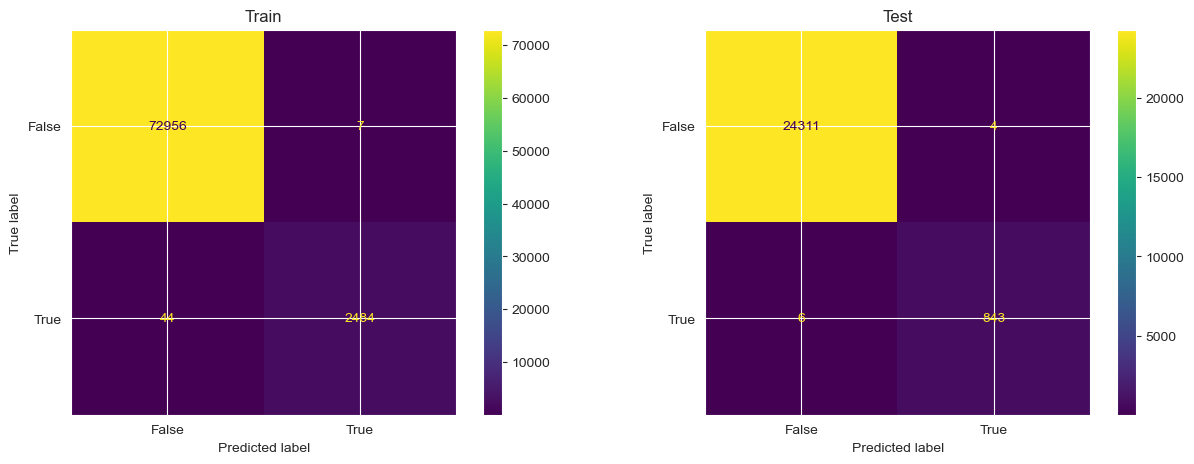

In [26]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

normalize = None
#normalize = 'true'

_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_train, y_pred_train, ax=axes[0], normalize=normalize)
axes[0].set_title('Train')

_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_test, y_pred_test, ax=axes[1], normalize=normalize)
axes[1].set_title('Test')

In [27]:
print(skm.classification_report(y_true_test, y_pred_test))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     24315
        True       1.00      0.99      0.99       849

    accuracy                           1.00     25164
   macro avg       1.00      1.00      1.00     25164
weighted avg       1.00      1.00      1.00     25164



In [28]:
prob_train = model.predict_proba(train_df)[:, 1]

Text(0.5, 1.0, 'Training Data')

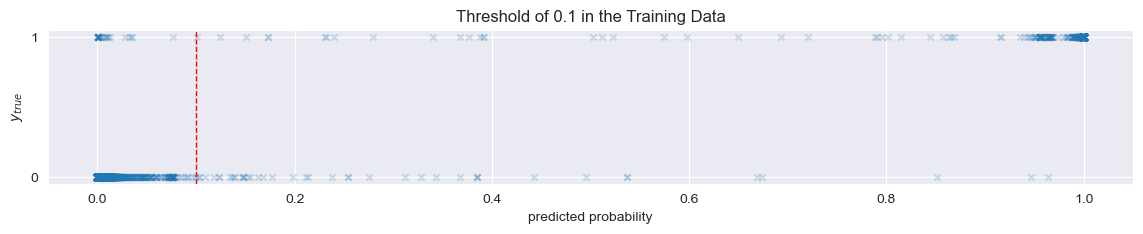

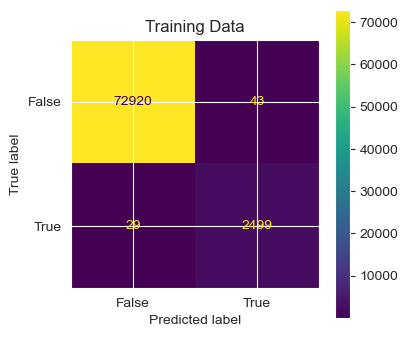

In [29]:
threshold = 0.1

fig, ax = plt.subplots(1,1,figsize=(14,2))
_ = ax.scatter(x=prob_train, y=y_true_train, s=20, alpha=0.2, marker='x')
_ = ax.axvline(x=threshold, color='red', linestyle='--', linewidth=1)
_ = ax.set_title(f'Threshold of {threshold} in the Training Data')
_ = ax.set_yticks([0,1])
_ = ax.set_ylabel('$y_{true}$')
_ = ax.set_xlabel('predicted probability')


fig, ax = plt.subplots(1,1, figsize=(4,4))
_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_train, prob_train>threshold, ax=ax)
ax.set_title('Training Data')

Text(0.5, 1.0, 'Test Data')

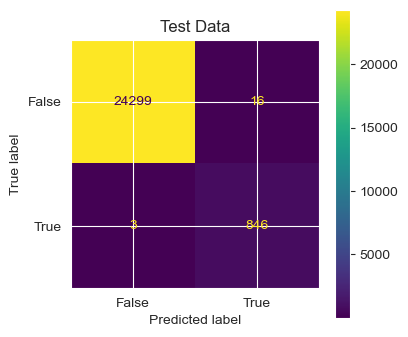

In [30]:
selected_threshold = 0.1

prob_test = model.predict_proba(test_df)[:, 1]

fig, ax = plt.subplots(1,1, figsize=(4,4))
_ = skm.ConfusionMatrixDisplay.from_predictions(y_true_test, prob_test>selected_threshold, ax=ax)
ax.set_title('Test Data')

We can visualize all thresholds at once ...

(0.98, 1.0)

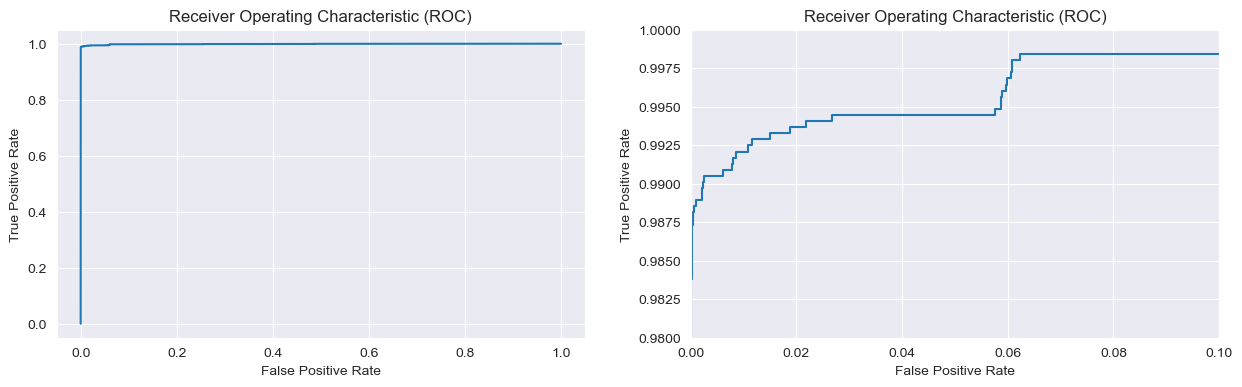

In [31]:
fpr, tpr, thresholds = skm.roc_curve(y_true_train, prob_train)

fig, axes = plt.subplots(1, 2,  figsize=(15, 4))
for ax in axes:
    ax.plot(fpr, tpr)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC)')

ax.set_xlim([0, 0.1])
ax.set_ylim([0.98, 1])

## Feature contributions

In [32]:
log_reg.coef_.flatten()

array([ 2.11325490e-01,  4.71564214e-02, -1.77763213e-03, -7.59098352e-02,
        5.49927453e-01,  0.00000000e+00,  4.32010737e-01, -5.11218171e-02,
        8.91513052e-01,  3.08332373e-01, -8.65710007e-02, -1.38558184e-01,
       -2.00475555e-01, -2.76371834e-01, -1.16639797e-01, -1.57985844e-01,
        0.00000000e+00,  0.00000000e+00, -4.87441739e-01,  1.03072795e+00,
        5.50520288e-01, -9.17351426e-02,  1.56593390e-01, -5.72852686e-01,
        5.06381861e-01, -7.25134879e-01, -2.60197984e-01,  4.78094628e-01,
        1.48359168e+00, -3.72899597e-01,  1.09204425e+00,  6.64474672e-01,
        7.01431494e-01,  2.97885452e-01,  2.22819008e-01,  2.10446515e-01,
        7.30413636e-02,  4.42444242e-01,  1.49673343e+00, -6.76373325e-01,
       -3.63349022e+00, -4.47553171e-01, -2.73413113e-01, -1.03017153e+00,
        1.06376213e+00,  1.04993195e+00, -1.41711629e-01, -4.08356140e-02,
        1.09904552e+00, -2.10540373e+00, -2.70962332e-02, -2.23951784e+00,
       -5.66975472e-02,  

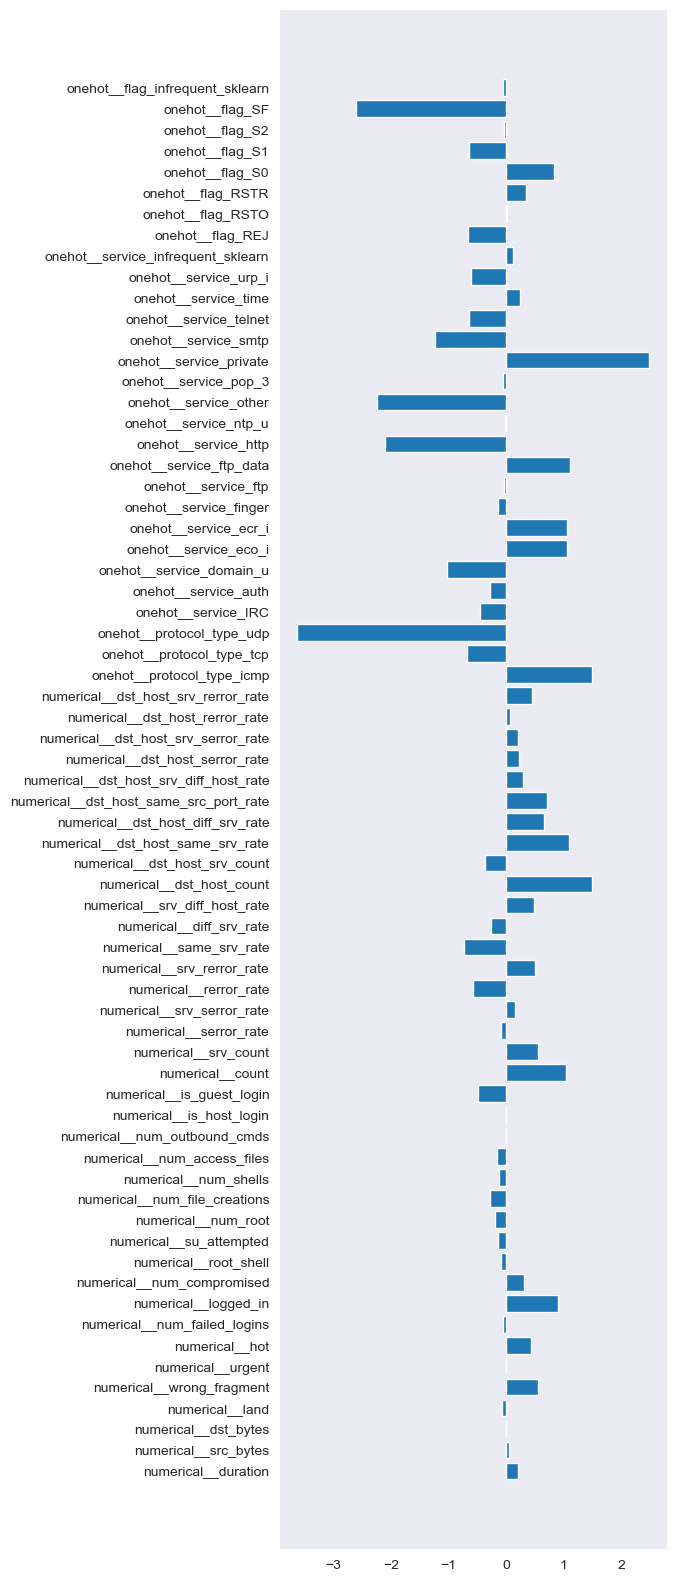

In [33]:
fig, ax = plt.subplots(1,1,figsize=(5,20))

logreg_features = preprocessor.get_feature_names_out()

plt.barh(
    y = range(len(logreg_features)),
    width = log_reg.coef_.flatten()
)
_ = plt.yticks(range(len(logreg_features)), logreg_features)
ax.grid()